In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

#De data binnenhalen
train= pd.read_csv('iris_with_outliers.csv')


In [5]:
unlabeled = train.drop(['Species', 'Unnamed: 0', 'Id'], axis=1)
unlabeled
clean_unlabelded = unlabeled.dropna()
print(clean_unlabelded.isna().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64


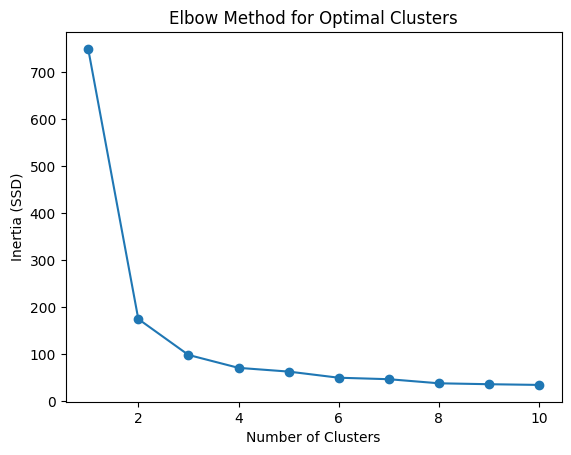

In [6]:
num_clusters = range(1, 11)

# Fit KMeans for each cluster and store the inertia (SSD) in a list
inertia = []
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clean_unlabelded)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(num_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (SSD)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

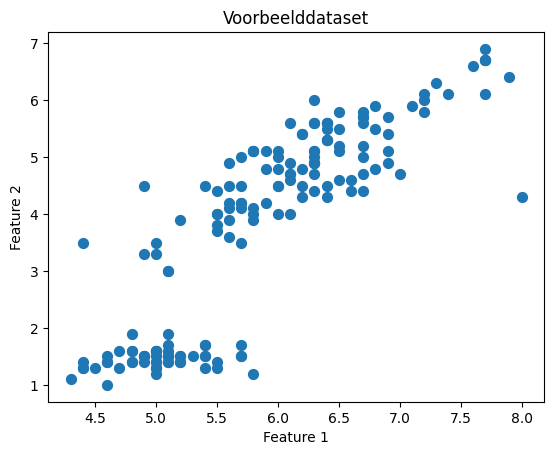

In [7]:
plt.scatter(clean_unlabelded['SepalLengthCm'], clean_unlabelded['PetalLengthCm'], s=50)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Voorbeelddataset")
plt.show()

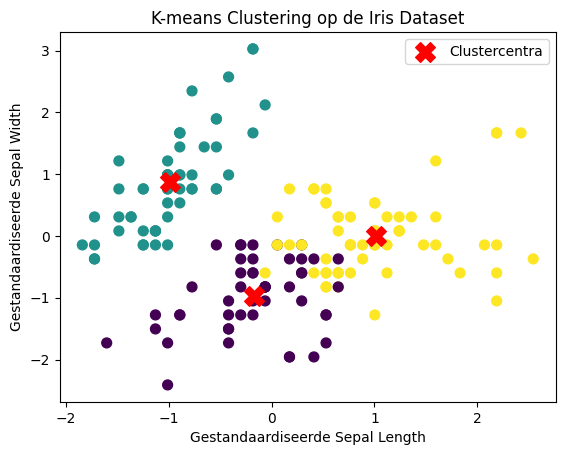

In [8]:
# Maak een imputer object dat NaN-waarden invult met het gemiddelde van de kolom

imputer = SimpleImputer(strategy='mean')

# Pas de imputer toe op je data
X_imputed = imputer.fit_transform(clean_unlabelded)

# Initialiseer de StandardScaler
scaler = StandardScaler()

# Nu je data geen NaN-waarden meer bevat, kun je deze standaardiseren
X_scaled = scaler.fit_transform(X_imputed)

# Kies het aantal clusters (K) - We gebruiken K=3 omdat we weten dat er 3 soorten Iris bloemen zijn
kmeans = KMeans(n_clusters=3, random_state=40)

# Pas K-means clustering toe (na het behandelen van NaN-waarden)
kmeans.fit(X_scaled)

# Krijg de coördinaten van de clustercentra
cluster_centers = kmeans.cluster_centers_

# Visualiseer de resultaten
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X', label='Clustercentra')

# Aangezien we aannemen dat de eerste twee features Sepal Length en Sepal Width zijn na standaardisatie
plt.xlabel("Gestandaardiseerde Sepal Length")
plt.ylabel("Gestandaardiseerde Sepal Width")

plt.title("K-means Clustering op de Iris Dataset")
plt.legend()
plt.show()